In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
# IMPORTAÇÃO DAS EMPRESAS INEXISTENTES DE FATO
empresas_inexistentes_df = pd.read_csv('C:\DATASETS\Empresas Baixadas\empresas_baixadas_consolidado.csv', header=0, sep=',', dtype='str')
empresas_inexistentes_df

,CNPJ
0,00000942000170
1,00001102000121
2,00005201000181
3,00005201000262
4,00010501000159
...,...
1375872,97711808000119
1375873,97800504000128
1375874,97921210000154
1375875,97979508000115


In [3]:
# IMPORTAÇÃO DAS EMPRESAS EXISTENTES DE FATO
empresas_existentes_df = pd.read_csv('C:\DATASETS\Empresas Existentes de Fato\empresas_existentes_de_fato.csv', header=0, sep=',', dtype='str')
empresas_existentes_df

,CNPJ
0,00000000000000
1,00000000000191
2,00000030000106
3,00000166000108
4,00000208000100
...,...
184592,98593668000194
184593,98669997000252
184594,98670235000195
184595,98670656000116


In [ ]:
# IMPORTAÇÃO DAS BASE NACIONAL DE EMPRESAS
empresas_df = pd.read_csv(r'C:\DATASETS\CNPJ\2-processado\empresas.csv', header=0, sep=',', dtype='str')
empresas_df

### Rotulagem das empresas inexistentes:

In [5]:
# Selecionar da base nacional apenas aquelas que constam na base de empresas inexistentes de fato
empresas_rotuladas_df = empresas_df[empresas_df.cnpj.isin(empresas_inexistentes_df.CNPJ)]

In [6]:
# Conferindo quantidade de linhas:
print(empresas_rotuladas_df.shape)
print(empresas_inexistentes_df.shape)

(1375877, 38)
(1375877, 1)


Conforme esperado. Todos os CNPJs de empresas inexistentes existem na base de empresas.

In [7]:
# Rotula as empresas inexistentes de fato
empresas_rotuladas_df = empresas_rotuladas_df.assign(inexistente=True)
empresas_rotuladas_df

,cnpj,matriz_filial,razao_social,nome_fantasia,situacao,data_situacao,motivo_situacao,nm_cidade_exterior,cod_pais,nome_pais,...,qualif_resp,capital_social,porte,opc_simples,data_opc_simples,data_exc_simples,opc_mei,sit_especial,data_sit_especial,inexistente
9015,00000942000170,1,NILZA LAVISO ARAUJO,MIL CARIMBOS,08,20180201,67,NaN,NaN,NaN,...,50,0.0,01,6,20070701,20180201,N,NaN,NaN,True
9186,00001102000121,1,JOSE GERALDO PEREIRA SANTANA ME,NaN,08,20180201,67,NaN,NaN,NaN,...,50,0.0,01,6,20070701,20180201,N,NaN,NaN,True
13528,00005201000181,1,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,NaN,08,20180326,15,NaN,NaN,NaN,...,49,0.0,01,0,NaN,NaN,N,NaN,NaN,True
13529,00005201000262,2,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO,08,20180326,15,NaN,NaN,NaN,...,49,0.0,01,0,NaN,NaN,NaN,NaN,NaN,True
19039,00010501000159,1,B S PETRO COM E DIST DE DERIVADOS DE PETROLEO ...,B S PETRO,08,20180326,15,NaN,NaN,NaN,...,49,0.0,01,0,NaN,NaN,N,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46530110,97711808000119,1,JOSE GALVAO 00012312860,NaN,08,20180201,67,NaN,NaN,NaN,...,50,100.0,01,6,20110714,20180201,N,NaN,NaN,True
46530943,97800504000128,1,ARLETE COSTA MONTEIRO DE JESUS 00780171578,NaN,08,20180201,67,NaN,NaN,NaN,...,50,100.0,01,6,20110714,20180201,N,NaN,NaN,True
46531419,97921210000154,1,PATRICIA RODRIGUES DE OLIVEIRA 29081951866,NaN,08,20180201,67,NaN,NaN,NaN,...,50,100.0,01,6,20110714,20180201,N,NaN,NaN,True
46531746,97979508000115,1,CARLA ANDREZA LOPES DE SEIXAS 87485885200,NaN,08,20180201,67,NaN,NaN,NaN,...,50,100.0,01,6,20110714,20180201,N,NaN,NaN,True


### Rotulagem das empresas existentes:

In [8]:
# Selecionar da base nacional apenas aquelas que constam na base de empresas existentes
temp_df = empresas_df[empresas_df.cnpj.isin(empresas_existentes_df.CNPJ)]

In [9]:
# Conferindo quantidade de linhas:
print(temp_df.shape)
print(empresas_existentes_df.shape)

(184066, 38)
(184597, 1)


Verificamos que alguns CNPJs de empresas existentes não existem na base de empresas. Iremos analisar posteriormente.

In [10]:
# Rotula as empresas existentes de fato
temp_df = temp_df.assign(inexistente=False)
temp_df

,cnpj,matriz_filial,razao_social,nome_fantasia,situacao,data_situacao,motivo_situacao,nm_cidade_exterior,cod_pais,nome_pais,...,qualif_resp,capital_social,porte,opc_simples,data_opc_simples,data_exc_simples,opc_mei,sit_especial,data_sit_especial,inexistente
0,00000000000191,1,BANCO DO BRASIL SA,DIRECAO GERAL,02,20051103,00,NaN,NaN,NaN,...,10,9000000000000.0,05,0,NaN,NaN,N,NaN,NaN,False
7799,00000030000106,1,BIANCHI E DUALIBY OFTALMOLOGIA E DERMATOLOGIA ...,NaN,02,20051103,00,NaN,NaN,NaN,...,49,0.0,01,6,20150101,20151231,N,NaN,NaN,False
7977,00000166000108,1,IRMAOS RODOPOULOS LTDA,NaN,02,20051103,00,NaN,NaN,NaN,...,49,187187000.0,05,0,NaN,NaN,N,NaN,NaN,False
8018,00000208000100,1,BRB BANCO DE BRASILIA SA,BRB,02,20051103,00,NaN,NaN,NaN,...,16,18422500000.0,05,0,NaN,NaN,N,NaN,NaN,False
8322,00000368000150,1,CASA MILITAR DO GABINETE DO GOVERNADOR,CASA MILITAR GAB GOV,02,20051103,00,NaN,NaN,NaN,...,05,0.0,05,0,NaN,NaN,N,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46534754,98593668000194,1,AUTO VIACAO VENANCIO AIRES LTDA,VIASUL,02,20040515,00,NaN,NaN,NaN,...,49,200000000.0,05,0,NaN,NaN,N,NaN,NaN,False
46535094,98669997000252,2,E. R. AMANTINO INDUSTRIA METALURGICA LTDA,MICROVERA,02,20051103,00,NaN,NaN,NaN,...,49,0.0,05,0,NaN,NaN,NaN,NaN,NaN,False
46535112,98670235000195,1,MAZZAROLLO - AGRO MAQUINAS LTDA,NaN,02,20020720,00,NaN,NaN,NaN,...,49,160000000.0,05,0,NaN,NaN,N,NaN,NaN,False
46535127,98670656000116,1,RESTAURANTE FARINA LTDA,NaN,02,20050416,00,NaN,NaN,NaN,...,49,0.0,01,7,20070701,NaN,N,NaN,NaN,False


In [11]:
cnpj_nao_estao_na_base = set(empresas_existentes_df.CNPJ).difference(empresas_df.cnpj)
print(len(cnpj_nao_estao_na_base))
print(cnpj_nao_estao_na_base)

531
{'39969904000165', '40176302000130', '39994517000189', '40810623000144', '40070911000100', '40202548000139', '40137472000105', '39914786000198', '40650484000139', '41199932000192', '39932075000146', '40494693000130', '40154779000114', '39980450000123', '39930217000136', '40218866000198', '40183324000127', '39961159000108', '39997619000158', '40135169000173', '39949365000100', '40096146000105', '60849197003428', '32859102000234', '39932588000157', '40188996000125', '40138890000117', '40579031000163', '40153839000184', '40600966000184', '41346229000160', '41350302000177', '40575898000140', '39924994000178', '41147080000190', '39973255000176', '40689592000115', '40578598000115', '40128091000160', '40282503000111', '40070888000153', '40975657000199', '39944458000134', '40214895000181', '40996881000167', '40578723000197', '41473548000136', '39970043000135', '41176905000102', '39899084000182', '39943846000109', '40148268000190', '40079934000185', '40086485000100', '40028310000139', '4014

In [12]:
min(cnpj_nao_estao_na_base)

'00000000000000'

In [13]:
cnpj_nao_estao_na_base.remove('00000000000000')
min(cnpj_nao_estao_na_base)

'00528924500012'

Consulta no site da RFB para o CNPJ 00528924500012: O número do CNPJ não é válido. Verifique se o mesmo foi digitado corretamente. (010-CON-FORM). Consulta realizada em 16/04/2021 às 19:06:56

In [14]:
# Função de validar CNPJ, copiada de https://github.com/rafahlobo/cpfValidator/blob/master/cpf.py
def isCnpjValid(cnpj):
    """ If cnpf in the Brazilian format is valid, it returns True, otherwise, it returns False. """

    # Check if type is str
    if not isinstance(cnpj,str):
        return False

    # Remove some unwanted characters
    cpf = re.sub("[^0-9]",'',cnpj)

    # Checks if string has 11 characters
    if len(cpf) != 14:
        return False

    sum = 0
    weight = [5,4,3,2,9,8,7,6,5,4,3,2]

    """ Calculating the first cpf check digit. """
    for n in range(12):
        value =  int(cpf[n]) * weight[n]
        sum = sum + value


    verifyingDigit = sum % 11

    if verifyingDigit < 2 :
        firstVerifyingDigit = 0
    else:
        firstVerifyingDigit = 11 - verifyingDigit

    """ Calculating the second check digit of cpf. """
    sum = 0
    weight = [6,5,4,3,2,9,8,7,6,5,4,3,2]
    for n in range(13):
        sum = sum + int(cpf[n]) * weight[n]

    verifyingDigit = sum % 11

    if verifyingDigit < 2 :
        secondVerifyingDigit = 0
    else:
        secondVerifyingDigit = 11 - verifyingDigit

    if cpf[-2:] == "%s%s" % (firstVerifyingDigit,secondVerifyingDigit):
        return True
    return False

In [15]:
cnpj_nao_estao_na_base.remove('00528924500012')
min(cnpj_nao_estao_na_base)

'03116727000208'

In [16]:
# Remove os CNPJs inválidos:
lista = [cnpj for cnpj in cnpj_nao_estao_na_base if isCnpjValid(cnpj)]
print(len(lista))
print(min(cnpj_nao_estao_na_base))

528
03116727000208


![alt text](Rotulagem_Empresas_Existentes_e_Inexistentes-CNPJs_novos.png)

In [17]:
# Coloca em um mesmo dataframe as empresas rotuladas, existentes e inexistentes
empresas_rotuladas_df = pd.concat([empresas_rotuladas_df, temp_df], ignore_index=True)

### Análise dos dados:

In [18]:
print(empresas_rotuladas_df.describe)
print(empresas_rotuladas_df.info())

<bound method NDFrame.describe of                    cnpj matriz_filial  \
0        00000942000170             1   
1        00001102000121             1   
2        00005201000181             1   
3        00005201000262             2   
4        00010501000159             1   
...                 ...           ...   
1559938  98593668000194             1   
1559939  98669997000252             2   
1559940  98670235000195             1   
1559941  98670656000116             1   
1559942  98674195000150             1   

                                              razao_social  \
0                                      NILZA LAVISO ARAUJO   
1                          JOSE GERALDO PEREIRA SANTANA ME   
2        PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA   
3        PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA   
4        B S PETRO COM E DIST DE DERIVADOS DE PETROLEO ...   
...                                                    ...   
1559938                    AUTO VIACAO 

In [19]:
(empresas_rotuladas_df.isnull().sum() / empresas_rotuladas_df.shape[0] * 100).sort_values(ascending=False)

nm_cidade_exterior    99.999744
cod_pais              99.998333
nome_pais             99.998333
sit_especial          99.973525
data_sit_especial     99.973525
telefone_2            96.758856
ddd_2                 96.753022
num_fax               96.153385
ddd_fax               96.151975
complemento           59.079082
nome_fantasia         56.109230
email                 39.208035
data_exc_simples      10.277042
data_opc_simples       3.360059
ddd_1                  1.338382
telefone_1             1.338318
opc_mei                0.806055
tipo_logradouro        0.127312
bairro                 0.030642
numero                 0.005898
cep                    0.001667
logradouro             0.000256
razao_social           0.000000
data_situacao          0.000000
motivo_situacao        0.000000
matriz_filial          0.000000
situacao               0.000000
inexistente            0.000000
uf                     0.000000
cod_nat_juridica       0.000000
data_inicio_ativ       0.000000
cnae_fis

In [20]:
empresas_rotuladas_df.inexistente.value_counts()

True     1375877
False     184066
Name: inexistente, dtype: int64

Vamos remover colunas com alto índice de nulos (>50%, exceto nome fantasia) e colunas que não precisaremos:

In [21]:
empresas_rotuladas_df = empresas_rotuladas_df.drop(columns=['nm_cidade_exterior', 'cod_pais', 'nome_pais', 'sit_especial', 'data_sit_especial', 'telefone_2', 'ddd_2', 'num_fax', 'ddd_fax', 'data_exc_simples', 'data_opc_simples', 'cod_municipio'])

### Preparação / tratamento de algumas colunas:

##### Coluna capital social:

In [22]:
empresas_df.capital_social.describe

<bound method NDFrame.describe of 0           9000000000000.0
1                       0.0
2                       0.0
3                       0.0
4                       0.0
                 ...       
46535798                0.0
46535799                0.0
46535800                0.0
46535801                0.0
46535802                0.0
Name: capital_social, Length: 46535803, dtype: object>

Conferindo o capital social do CNPJ da linha 0 pelo site da Receita Federal:
![alt text](Capital_Social_BB.png "Title")
CNPJ: 00000000000191
Site: https://servicos.receita.fazenda.gov.br/servicos/cnpjreva/Cnpjreva_Solicitacao.asp

Percebe-se que o capital social dessa linha no dataframe está com o valor 9000000000000.0. Precisamos fazer divisão por 100 para corrigir. Vamos fazer essa correção no dataframe das empresas rotuladas:

In [23]:
# Fazendo a correção:
empresas_rotuladas_df.capital_social = empresas_rotuladas_df.capital_social.astype('float')/100

In [24]:
empresas_rotuladas_df.capital_social.value_counts()

1.000000e+00    806974
5.000000e+03    123989
1.000000e+03    100302
1.000000e+04     64584
2.000000e+03     51084
                 ...  
4.793000e+04         1
3.050482e+08         1
7.668000e+05         1
1.226832e+07         1
1.664192e+08         1
Name: capital_social, Length: 14396, dtype: int64

##### Coluna opc_simples:

Pelo dicionário de dados, os valores são: 0 OU BRANCO - NÃO OPTANTE; 5 E 7 – OPTANTESPELO SIMPLES; 6 E 8 – EXCLUÍDO DO SIMPLES. Podemos reduzir para 0 - NÃO OPTANTE; 5 - OPTANTE; 6 - EXCLUÍDO

In [25]:
print(empresas_rotuladas_df.opc_simples.value_counts())

6    1395043
5      98319
0      52415
7       9582
8       4584
Name: opc_simples, dtype: int64


Lembrando que já verificamos anteriormente que a coluna opc_simmples não possui nulos.

In [26]:
empresas_rotuladas_df.opc_simples = np.where(empresas_rotuladas_df.opc_simples == '7', 5, 
        np.where(empresas_rotuladas_df.opc_simples == '8', 6, empresas_rotuladas_df.opc_simples))
print(empresas_rotuladas_df.opc_simples.value_counts())

6    1395043
5      98319
0      52415
5       9582
6       4584
Name: opc_simples, dtype: int64


In [27]:
# Corrigindo valores iguais com tipos diferentes:
empresas_rotuladas_df.opc_simples = empresas_rotuladas_df.opc_simples.astype(np.uint8)

In [28]:
print(empresas_rotuladas_df.opc_simples.value_counts())

6    1399627
5     107901
0      52415
Name: opc_simples, dtype: int64


##### Coluna opc_mei:

Pelo dicionário de dados, os valores são: S-SIM; N-NÃO; OUTROS (BRANCO, ETC) Podemos reduzir para uma variável booleana 1-OPÇÃO PELO MEI; 0-NÃO OPÇÃO PELO MEI

In [29]:
print(empresas_rotuladas_df.opc_mei.value_counts())

N    1520470
S      26899
Name: opc_mei, dtype: int64


In [30]:
empresas_rotuladas_df.opc_mei = np.where(empresas_rotuladas_df.opc_mei == 'S', True, False).astype('bool')
print(empresas_rotuladas_df.opc_mei.value_counts())

False    1533044
True       26899
Name: opc_mei, dtype: int64


A diferença do resultado de False (de 1520470 para 1533044) é devido aos valores OUTROS.

##### Coluna data_inicio_ativ:

Conversão da data_inicio_ativ em anos_de_atividade_empresa, com identificação de erros:

In [31]:
# Conhecendo a coluna:
print(empresas_rotuladas_df.data_inicio_ativ.min())
print(empresas_rotuladas_df.data_inicio_ativ.max())

18911023
20201120


In [32]:
# Identificando o CNPJ com a data de 1891:
empresas_rotuladas_df[empresas_rotuladas_df.data_inicio_ativ == '18911023']

,cnpj,matriz_filial,razao_social,nome_fantasia,situacao,data_situacao,motivo_situacao,cod_nat_juridica,data_inicio_ativ,cnae_fiscal,...,municipio,ddd_1,telefone_1,email,qualif_resp,capital_social,porte,opc_simples,opc_mei,inexistente
1476006,21255567000189,1,COMPANHIA TECIDOS SANTANENSE,NaN,02,20051103,00,2046,18911023,1321900,...,MONTES CLAROS,38,32151358,NaN,16,150000000.0,05,0,False,False


Via consulta na internet, observamos uma empresa que realmente existe: http://www.santanense.com.br/empresa.html. Tem data de abertura em 23/10/1891. CNPJ 21.255.567/0001-89. <br> Ou seja, podemos continuar com a conversão.

In [33]:
# Analisando a coluna data_situacao, que poderá ser usada 
# no cálculo dos 'anos_de_atividade_empresa'
print(empresas_rotuladas_df.data_situacao.min())
print(empresas_rotuladas_df.data_situacao.max())

19451019
20201120


As datas acima não apresentam anormalidade.

In [34]:
# Cálculo do tempo de atividade da empresa (Em anos). 
# Feito tomando como data referência o dia 01/04/2021, mas caso a empresa esteja na situação 08 (Baixada),
# a data referência passa a ser a data_situacao.
empresas_rotuladas_df["anos_de_atividade_empresa"] = round((np.where(empresas_rotuladas_df.situacao=='08', 
empresas_rotuladas_df.data_situacao.astype(int), 20210401) - empresas_rotuladas_df.data_inicio_ativ.astype(int) ) / 10000)
.astype(np.uint16)

Verificando o resultado da conversão:

In [35]:
print(empresas_rotuladas_df.anos_de_atividade_empresa.value_counts())
print(empresas_rotuladas_df.anos_de_atividade_empresa.min())
print(empresas_rotuladas_df.anos_de_atividade_empresa.max())

5      296196
6      293300
7      281736
4      276570
8      233096
        ...  
94          1
92          1
78          1
77          1
130         1
Name: anos_de_atividade_empresa, Length: 93, dtype: int64
0
130


In [36]:
empresas_rotuladas_df.anos_de_atividade_empresa.plot.hist(bins=10)

In [37]:
empresas_rotuladas_df.anos_de_atividade_empresa.describe()

count    1.559943e+06
mean     6.973359e+00
std      5.267015e+00
min      0.000000e+00
25%      5.000000e+00
50%      6.000000e+00
75%      7.000000e+00
max      1.300000e+02
Name: anos_de_atividade_empresa, dtype: float64

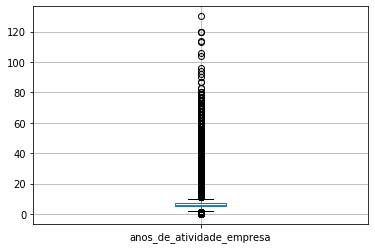

In [38]:
empresas_rotuladas_df.boxplot(column = ['anos_de_atividade_empresa'])

Não vamos tratar outliers agora.

Interessante observar empresas que não ficaram nem um ano abertas:

In [39]:
empresas_rotuladas_df[empresas_rotuladas_df.anos_de_atividade_empresa==0].inexistente.value_counts()

False    602
True      97
Name: inexistente, dtype: int64

##### Coluna ddd_1: 

Tem grande índice de nulos. Não vamos preenchê-los da forma tradicional, como com a moda. Queremos aqui justamente identificar aspectos comportamentais, nesse caso o comportamento de não preenchimento do DDD. Então, vamos preencher os nulos com 'NI', de não informado.

In [40]:
# Colocando nos DDD_1 nulos o valor 'NI'
empresas_rotuladas_df["ddd_1"].fillna('NI', inplace=True)

### Feature engineering

##### Identificação de números de telefone inválidos - Nova coluna booleana

Vamos considerar como comportamento desviante o ato de uma pessoa informar à Receita Federal um número de telefone inválido para cadastro de uma empresa. Estamos assim considerando pois o que se espera (comportamento esperado) é a informação de um número de telefone válido. Essa consideração nos permite fazer a análise dos números de telefone da base de empresas, para identificação de números provavelmente inválidos. Ademais, a formação de números de telefone é uma regra publicamente conhecida. A seguir, será criada uma função para identificar esses números de telefones inválidos, e será criada uma variável booleana (telefone_provavelmente_invalido) para marcar as empresas que estejam com números assim considerados.

In [41]:
# Analisando a situação dos números de telefone presentes na base:
empresas_rotuladas_df.telefone_1.str.len().value_counts()

8.0    1528886
7.0       5253
1.0       4827
6.0         60
4.0         27
5.0          7
3.0          4
2.0          2
Name: telefone_1, dtype: int64

Criação da função e marcação das linhas com telefone provavelmente inválidos:

In [42]:
def func_telefone_provavelmente_invalido(tel):
    # Sobre os telefones nulos, é um comportamento diferente (não preenchimento). 
    # Não precisamos considerá-los nessa análise, pois na análise da coluna DDD já 
    # classificamos os nulos como NI. Fazer o mesmo com a coluna telefone seria
    # praticamente uma redundância.
    if pd.isnull(tel):
        return False    
   
    tel = str(tel)
   
    # Verifica se o número tem 6 ou menos dígitos. Obs: estamos considerando que os 
    # números com 7 dígitos não são comportamento desviante, foram apenas erros de
    # preenchimento.
    if len(tel) <= 6:
        return True
    
    # Verifica se o telefone é formado de um só número (ex: 11111111 ou 99999999).
    # Isso pega também números com menos de 8 dígitos (como 11111)
    if len(set(tel)) == 1:
        return True    
    
    # Calcula a frequência de cada dígito no número de telefone
    freq = dict.fromkeys(tel, 0)
    for digito in tel:
        freq[digito] += 1
        if freq[digito] >= 7:
            # Se tem 1 dígito com 7 repetições, já finaliza a função, chance alta de
            # ser telefone inválido (como 922222222)
            return True
        
    # Verifica se temos uma sequência de números, como 12345678. Para simplificar,
    # vamos considerar existência apenas de números.
    if tel in '01234567890' or tel in '09876543210':
        return True
    
    # Verifica se o telefone está no padrão XYXYXYXY
    par_final = tel[-2:]
    ocorrencias_par_final = tel.count(par_final)
    if ocorrencias_par_final >= 4:
        return True
    
    # Verifica se o telefone está no padrão XXXXYYYY
    if len(set(tel[-4:])) == 1 and len(set(tel[-8:-4])) == 1:
        return True
    
    return False

empresas_rotuladas_df["telefone_provavelmente_invalido"] = empresas_rotuladas_df["telefone_1"].map(func_telefone_provavelmente_invalido)

Verificação dos resultados:

In [43]:
# Verifica alguns resultados:
tel_invalidos_df = empresas_rotuladas_df.loc[empresas_rotuladas_df["telefone_provavelmente_invalido"] == True, ['cnpj', 'razao_social', 'uf', 'municipio', 'ddd_1', 'telefone_1', 'telefone_provavelmente_invalido']]
tel_invalidos_df

,cnpj,razao_social,uf,municipio,ddd_1,telefone_1,telefone_provavelmente_invalido
545,01268677000178,ANTONIA GOUBETTI POLONIO,PR,TERRA RICA,0441,1284,True
818,01777084000137,ADEMIR B DE LIMA,PR,ARAUCARIA,41,22222222,True
948,02090634000108,FRANCISCO GOMES DO NASCIMENTO 07101651372,CE,CAMOCIM,88,99999999,True
1159,02451259000184,ITAMAR ROSA DE OLIVEIRA,MS,ITAQUIRAI,0674,612454,True
1544,03230617000191,GALETERIA CONFRARIA DO RADICCI LTDA,RS,RIO GRANDE,0532,302040,True
...,...,...,...,...,...,...,...
1559132,95402665000138,COVERES CONSERVACAO DE IMOVEIS LTDA,PR,COLOMBO,041,225495,True
1559157,95424321001363,J MALUCELLI EQUIPAMENTOS S/A,SC,SAO JOSE,48,30000000,True
1559405,96601968000142,MEND COMERCIO E SERVICOS ELETRONICOS LTDA,SP,SAO PAULO,11,33333339,True
1559580,97316764000122,R K DE SOUZA,RS,SANTO ANTONIO DA PATRULHA,81,790850,True


Verificamos que existem 8448 empresas com telefones provavalmente inválidos.

In [44]:
tel_invalidos_df.telefone_1.value_counts()

0           4820
00000000     976
99999999     669
11111111     370
22222222     331
            ... 
86888888       1
35333333       1
87777777       1
351556         1
99499999       1
Name: telefone_1, Length: 277, dtype: int64

In [45]:
# Verificação inversa (verificação dos números válidos):
tel_validos_df = empresas_rotuladas_df.loc[(empresas_rotuladas_df["telefone_provavelmente_invalido"] == False)&(empresas_rotuladas_df["telefone_1"].notnull()), ['cnpj', 'razao_social', 'uf', 'municipio', 'ddd_1', 'telefone_1', 'telefone_provavelmente_invalido']]
tel_validos_df

,cnpj,razao_social,uf,municipio,ddd_1,telefone_1,telefone_provavelmente_invalido
2,00005201000181,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,SP,SAO PAULO,11,81651700,False
3,00005201000262,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,SP,MONTE ALEGRE DO SUL,11,33380127,False
5,00014369000153,LEONIDES PEREIRA,SP,RIBEIRAO PRETO,16,36350123,False
6,00022120000190,LUIZ CARLOS DE CARVALHO INOJOSA 10353093866,SP,CAJATI,13,96327398,False
10,00057619000132,REALSPUMA INDUSTRIA E COMERCIO DE COLCHOES LTDA,GO,SANTO ANTONIO DO DESCOBERTO,061,6261333,False
...,...,...,...,...,...,...,...
1559930,98410863000131,RADIO CHARRUA LTDA,RS,URUGUAIANA,55,34121731,False
1559934,98522246000128,RODOVIARIO SCHIO LTDA,SP,SAO PAULO,11,36217211,False
1559935,98522246002848,RODOVIARIO SCHIO LTDA,PE,CABO DE SANTO AGOSTINHO,81,35210030,False
1559938,98593668000194,AUTO VIACAO VENANCIO AIRES LTDA,RS,VENANCIO AIRES,51,37931700,False


Sobre os telefones nulos, conforme comentado na função anterior, não estamos considerando como inválidos. Na análise da coluna DDD, já classificamos os nulos como NI. Fazer o mesmo com a coluna telefone seria praticamente uma redundância. Além disso, lembramos que números com 7 dígitos não foram considerados inválidos na função.
<br>
Avaliando algumas estatísticas após a identificação dos números inválidos:

In [46]:
tel_invalidos_df.telefone_1.str.len().value_counts()

1    4827
8    3521
6      60
4      27
5       7
3       4
2       2
Name: telefone_1, dtype: int64

In [47]:
tel_validos_df.telefone_1.str.len().value_counts()

8    1525365
7       5253
Name: telefone_1, dtype: int64

Como se percebe acima, os telefones válidos são apenas aqueles com 7 ou 8 dígitos. Também podemos concluir pelos exemplos anteriormente analisados que a classificação de telefone inválido foi positiva.

Fim da identificação de telefone inválido.

In [48]:
# Salvando resultado
empresas_rotuladas_df.to_csv(r'C:\DATASETS\Empresas Rotuladas\empresas_rotuladas.csv', index = False)